In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import re
from matplotlib.pyplot import figure, show, axes, sci
from matplotlib import cm, colors
from matplotlib.font_manager import FontProperties
from numpy import amin, amax, ravel
import numpy.ma as ma

In [26]:
A_set = set()
B1_set = set()
B2_set = set()
X_set = set()
value_eg = {}

import re
filename = '/Users/yao/Google Drive/data/2116/data/Eg_result'
with open(filename,'r') as f:
    for line in f:
        compound = line.split()[0]
        eg = line.split()[1]
        value_eg[compound] = eg
        A_set.add(re.split('1|2|6', compound)[0])
        B1_set.add(re.split('1|2|6', compound)[1])
        B2_set.add(re.split('1|2|6', compound)[2])
        X_set.add(re.split('1|2|6', compound)[3])  
print(A_set)
print(B1_set)
print(B2_set)
print(X_set)

A_list = ['Li','Na','K','Rb','Cs']
B1_list = ['Li','Na','K','Rb','Cs', 'Cu','Ag','Au','Hg','Tl']
B2_list = ['Sc', 'Y', 'Ti','V','Nb','Ta','Cr','Mo','Mn','Fe','Ru','Co','Rh','Ir',\
           'Ni','Pd','Au','Al','Ga','In','Tl','As','Sb','Bi']
X_list = ['F','Cl','Br','I']

if set(A_list)==A_set and set(B1_list)==B1_set and set(B2_list)==B2_set and set(X_list)==X_set:
    print('True')


{'Rb', 'Na', 'K', 'Li', 'Cs'}
{'Hg', 'Tl', 'Cu', 'K', 'Na', 'Au', 'Rb', 'Li', 'Ag', 'Cs'}
{'Fe', 'Tl', 'Cr', 'Nb', 'Ti', 'Mn', 'Rh', 'Ga', 'Sc', 'Bi', 'Co', 'Y', 'Ni', 'As', 'Ir', 'Mo', 'Au', 'Sb', 'Ta', 'Al', 'Ru', 'V', 'Pd', 'In'}
{'Br', 'I', 'F', 'Cl'}
True


In [27]:
import numpy as np
size_left = len(A_list)
size_right = len(B1_list)
size_bottom = len(B2_list)
eg = np.zeros( (size_right,size_left,size_bottom) )
number = 0
for a in range(size_left):
    for b in range(size_bottom):
        for c in range(size_right):
            compound = A_list[a]+'2'+B1_list[c]+'1'+B2_list[b]+'1'+X_list[3]+'6'
            if compound in value_eg:
                eg[c][a][b] = value_eg[compound]
                number +=1
            else:
                eg[c][a][b] = 1000
import numpy.ma as ma
masked_eg = ma.masked_where(eg>3, eg)
masked_eg = ma.masked_where(masked_eg==0, masked_eg)

In [28]:
fig = figure(figsize=(6,4))
#cmap = cm.cool
w = 2
h = 0.15
ax = []
images = []
vmin = 1e40
vmax = -1e40
cax = fig.add_axes([1.3, 1, 0.02, 0.9])

In [29]:
for i in range(size_right):
    pos = [0, 2 - i*1.2*h, w, h]
    a = fig.add_axes(pos)
    plt.yticks(np.arange(size_left), A_list, size='small')
    plt.xticks(np.arange(size_bottom),[])
    if i == size_right-1: 
        plt.xticks(np.arange(size_bottom), B2_list, size='small')
    dd = ravel(masked_eg[i])
    # Manually find the min and max of all colors for
    # use in setting the color scale.
    vmin = min(vmin, amin(dd))
    vmax = max(vmax, amax(dd))
    images.append(a.imshow(masked_eg[i],interpolation = 'nearest',aspect=1))

    ax.append(a)

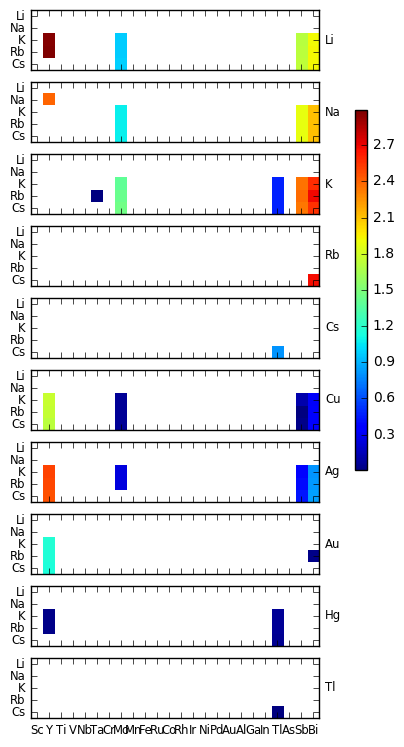

In [30]:
# Set the first image as the master, with all the others
# observing it for changes in cmap or norm.

class ImageFollower:
    'update image in response to changes in clim or cmap on another image'
    def __init__(self, follower):
        self.follower = follower
    def __call__(self, leader):
        self.follower.set_cmap(leader.get_cmap())
        self.follower.set_clim(leader.get_clim())
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for i, im in enumerate(images):
    im.set_norm(norm)
    if i > 0:
        images[0].callbacksSM.connect('changed', ImageFollower(im))
fig.colorbar(images[0], cax)
axes(ax[0])     # Return the current axes to the first one,
sci(images[0])  # because the current image must be in current axes.

#rect = fig.patch
#rect.set_facecolor('white')

for i in range(size_right):
    ax[i].text(1.02, 0.45, B1_list[i],size='small',transform=ax[i].transAxes)


#ax[0].text(1.2, 1.1, "eV",size=10,transform=ax[0].transAxes)
#ax[0].text(-0.16, 1.1, "a", size=13,transform=ax[0].transAxes)
plt.savefig('/Users/yao/Google Drive/data/2116/2116 figure/full_data/Eg_I_zoomin.pdf', dpi=300, bbox_inches="tight")
plt.show()
